In [1]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [2]:
dataname = "m4_monthly_dates"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_dates.


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


In [4]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [5]:
train_entry

{'start': Timestamp('1976-06-30 00:00:00', freq='M'),
 'target': array([ 8000.,  8350.,  8570.,  7700.,  7080.,  6520.,  6070.,  6650.,
         6830.,  5710.,  5260.,  5470.,  7870.,  7360.,  8470.,  7880.,
         6750.,  6860.,  6220.,  6650.,  5450.,  5280.,  4970.,  5550.,
         7750.,  7760.,  7190.,  7440.,  6590.,  6210.,  6010.,  6390.,
         5780.,  5700.,  4680.,  4970.,  6850.,  6740.,  7490.,  6250.,
         6900.,  5870.,  5610.,  6310.,  6110.,  6090.,  5810.,  6060.,
         6950.,  7820.,  8270.,  7840.,  7850.,  6710.,  6220.,  7430.,
         6560.,  7080.,  6680.,  6900.,  8680.,  8450.,  8670.,  8470.,
         7910.,  8140.,  7310.,  7860.,  7730.,  7330.,  7430.,  7150.,
         8720.,  8340.,  8840.,  8780.,  8250.,  8180.,  7570.,  9280.,
         9220.,  9140.,  8950.,  8540.,  9360.,  9750.,  9270.,  8690.,
         8200.,  7610.,  7160.,  8280.,  7370.,  7130.,  6840.,  7260.,
         7430.,  7950.,  7790.,  8090.,  7480.,  6700.,  6650.,  6960.,


## Plot Series

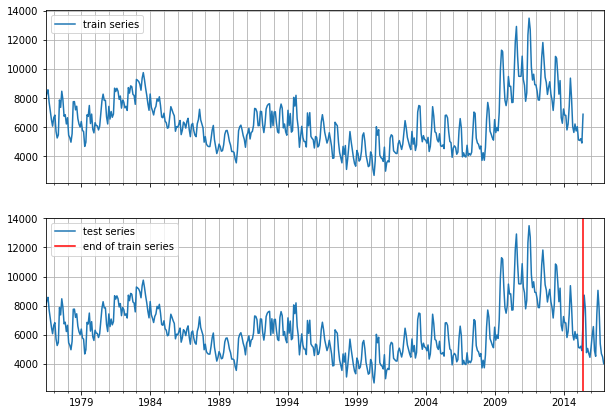

In [6]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [9]:
%%time
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly_atm", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.42it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[0] Elapsed time 9.231 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.577855
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.64it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 8.875 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.095944
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.56it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 9.004 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.643074
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.06it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 8.257 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.537386
INF

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.761322
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.49it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[36] Elapsed time 9.109 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.576659
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  5.83it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[37] Elapsed time 8.578 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.116431
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:10<00:00,  4.81it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[38] Elapsed time 10.409 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.462200
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.36it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 9.356 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.519315
INFO:root:Epoch[40] Learning rate is 0.00025
100%|█████

INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 50/50 [00:10<00:00,  4.91it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[72] Elapsed time 10.195 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.709252
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.91it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[73] Elapsed time 8.459 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.565942
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.36it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 7.890 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.434119
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.28it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 7.961 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.237080
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.36it/s, avg_epoch_loss=6.26]
INFO:root:E

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.090967  0.139487  26.759784            0.124769            0.104372   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.07it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[0] Elapsed time 8.279 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.065836
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.94it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 8.420 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.278937
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.65it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[2] Elapsed time 7.522 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.777101
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.58it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 7.604 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.641933
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.895143
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.14it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[36] Elapsed time 9.774 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.668608
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  5.92it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[37] Elapsed time 8.449 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.197516
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.13it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[38] Elapsed time 9.759 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.503318
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  6.05it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[39] Elapsed time 8.267 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.629264
INFO:root:Epoch[40] Learning rate is 0.00025
100%|████████

100%|██████████| 50/50 [00:07<00:00,  6.29it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[72] Elapsed time 7.964 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.673798
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.35it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[73] Elapsed time 7.882 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.410105
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:08<00:00,  5.73it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[74] Elapsed time 8.745 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.396036
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:09<00:00,  5.38it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[75] Elapsed time 9.299 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.939733
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.83it/s, avg_epoch_loss=7.5]
I

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.120819  0.138531  19.738728            0.124403            0.094896   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.45it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[0] Elapsed time 7.750 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.593514
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.70it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 8.793 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.104245
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.64it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 7.558 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.694645
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.98it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 7.162 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.531630
INF

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=6.377363
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.79it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[36] Elapsed time 7.383 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.449580
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.90it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[37] Elapsed time 7.250 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.068194
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.40it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[38] Elapsed time 7.812 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.572688
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:06<00:00,  7.17it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[39] Elapsed time 6.986 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.224010
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████

100%|██████████| 50/50 [00:07<00:00,  7.05it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[72] Elapsed time 7.094 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.730855
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  7.00it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[73] Elapsed time 7.142 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.538627
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.85it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[74] Elapsed time 7.317 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.341288
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.92it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[75] Elapsed time 7.244 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.050693
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.17it/s, avg_epoch_loss=6.77]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.118285  0.141227  23.020794            0.127303            0.097765   

   seed  epochs  num_batches  
0    44     100           50  
Seed: 45


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.41it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[0] Elapsed time 7.799 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.366062
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.69it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 7.494 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.176518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.85it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 7.313 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.750615
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.86it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[3] Elapsed time 7.296 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.559593
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.966426
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.30it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[36] Elapsed time 7.939 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.688134
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.02it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[37] Elapsed time 7.122 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.281182
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  6.08it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[38] Elapsed time 8.241 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.619415
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.11it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[39] Elapsed time 7.031 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.852941
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████

INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  7.01it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[72] Elapsed time 7.131 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.903672
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  7.12it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[73] Elapsed time 7.021 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.739075
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  7.06it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[74] Elapsed time 7.083 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.610313
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[75] Elapsed time 7.172 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.312333
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=6.48]
INFO:root:Epo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.245601  0.145718  30.507529             0.13223            0.118281   

   seed  epochs  num_batches  
0    45     100           50  
Seed: 46


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.24it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[0] Elapsed time 8.016 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.265907
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.10it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 8.218 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.178707
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.50it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 7.687 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.634694
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.88it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[3] Elapsed time 7.266 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.504924
INF

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=6.150277
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.05it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[36] Elapsed time 7.110 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.552102
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.79it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[37] Elapsed time 7.359 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.124018
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.53it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[38] Elapsed time 7.657 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.458027
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.08it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 7.064 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.515798
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████

100%|██████████| 50/50 [00:07<00:00,  6.91it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[72] Elapsed time 7.240 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.692873
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.94it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[73] Elapsed time 7.206 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.578381
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[74] Elapsed time 7.204 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.294593
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.89it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[75] Elapsed time 7.252 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.025123
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  6.23it/s, avg_epoch_loss=6.76]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.104244  0.138849  21.830846             0.12601            0.096742   

   seed  epochs  num_batches  
0    46     100           50  
Seed: 47


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.47it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 7.744 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.762667
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.74it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[1] Elapsed time 7.437 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.305009
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.67it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[2] Elapsed time 7.509 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.776756
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.18it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[3] Elapsed time 8.124 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.629092
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=6.291480
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  5.64it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[36] Elapsed time 8.861 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.703066
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.88it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[37] Elapsed time 7.269 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.231830
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.42it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[38] Elapsed time 7.807 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.566373
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.14it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 7.000 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.567822
INFO:root:Epoch[40] Learning rate is 0.00025
100%|███████

100%|██████████| 50/50 [00:07<00:00,  7.10it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[72] Elapsed time 7.040 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.779617
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  7.06it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[73] Elapsed time 7.085 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.423868
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.94it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[74] Elapsed time 7.219 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.512450
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.54it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[75] Elapsed time 7.640 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.985928
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.82it/s, avg_epoch_loss=7.37]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.153042  0.141775  23.707105            0.129102            0.104271   

   seed  epochs  num_batches  
0    47     100           50  
Seed: 48


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.56it/s, avg_epoch_loss=8.32]
INFO:root:Epoch[0] Elapsed time 7.625 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.317562
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.68it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 7.506 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.283400
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.86it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 7.307 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.751217
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.71it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 7.453 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.535147
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.965854
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.88it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[36] Elapsed time 7.266 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.610500
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.84it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[37] Elapsed time 7.306 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.200275
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  6.21it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[38] Elapsed time 8.063 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.529927
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.91it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 7.234 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.664974
INFO:root:Epoch[40] Learning rate is 0.00025
100%|███████

100%|██████████| 50/50 [00:07<00:00,  6.92it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[72] Elapsed time 7.246 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.706643
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  7.03it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[73] Elapsed time 7.109 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.683343
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 7.173 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.296653
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.93it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 7.216 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.237612
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.59it/s, avg_epoch_loss=6.43]


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.164775  0.140086  20.124156            0.127536            0.098206   

   seed  epochs  num_batches  
0    48     100           50  
Seed: 49


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.98it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[0] Elapsed time 8.375 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.742919
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.79it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1] Elapsed time 8.647 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.157724
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.89it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 7.259 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.628024
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.79it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 7.375 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.455806
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.999455
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.94it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[36] Elapsed time 7.203 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.662624
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.05it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[37] Elapsed time 7.109 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.110451
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.35it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[38] Elapsed time 7.891 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.508283
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.91it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 7.250 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.716090
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████

100%|██████████| 50/50 [00:08<00:00,  5.85it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[72] Elapsed time 8.562 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.697430
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:13<00:00,  3.79it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[73] Elapsed time 13.191 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.621048
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:09<00:00,  5.54it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[74] Elapsed time 9.045 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.276016
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.74it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[75] Elapsed time 8.710 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.116642
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.85it/s, avg_epoch_loss=6.58]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.186011  0.142958  21.195234            0.129191            0.089254   

   seed  epochs  num_batches  
0    49     100           50  
Seed: 50


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.44it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[0] Elapsed time 7.785 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.523556
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.74it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[1] Elapsed time 7.414 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.189120
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.88it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 7.262 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.721747
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.87it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[3] Elapsed time 7.296 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.560751
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.801849
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.90it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[36] Elapsed time 7.248 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.703631
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.72it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[37] Elapsed time 7.437 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.179575
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.35it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[38] Elapsed time 7.871 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.597943
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  7.03it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[39] Elapsed time 7.131 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.688173
INFO:root:Epoch[40] Learning rate is 0.00025
100%|████████

INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.98it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[72] Elapsed time 7.178 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.790482
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  7.08it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[73] Elapsed time 7.063 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.726307
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  7.00it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[74] Elapsed time 7.143 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.395395
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.94it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[75] Elapsed time 7.202 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.190577
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.95it/s, avg_epoch_loss=6.58]
INFO:root:Epo

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.10402  0.140699  28.230568            0.126385            0.108823    50   

   epochs  num_batches  
0     100           50  
Seed: 51


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.30it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 9.514 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.459393
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  5.93it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1] Elapsed time 8.433 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.144643
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.22it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[2] Elapsed time 5.427 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.616037
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.00it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 5.558 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.534611
IN

INFO:root:Epoch[35] Evaluation metric 'epoch_loss'=5.787322
INFO:root:Epoch[36] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  5.86it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[36] Elapsed time 8.551 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.604085
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  5.74it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[37] Elapsed time 8.708 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.135646
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:12<00:00,  4.16it/s, avg_epoch_loss=7.5] 
INFO:root:Epoch[38] Elapsed time 12.030 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.498751
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.30it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[39] Elapsed time 9.441 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.583299
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████

INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.28it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[72] Elapsed time 6.891 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.762565
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.65it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[73] Elapsed time 6.538 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.701928
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:05<00:00,  8.80it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 5.699 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.300285
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:05<00:00,  8.79it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[75] Elapsed time 5.685 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.122073
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  8.10it/s, avg_epoch_loss=6.76]
INFO:root:Epoc

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.174954  0.144194  28.090898            0.130774            0.112398   

   seed  epochs  num_batches  
0    51     100           50  
Wall time: 12h 46min 36s


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.090967,0.139487,26.759784,0.124769,0.104372,42,100,50
0,1.120819,0.138531,19.738728,0.124403,0.094896,43,100,50
0,1.118285,0.141227,23.020794,0.127303,0.097765,44,100,50
0,1.245601,0.145718,30.507529,0.132230,0.118281,45,100,50
0,1.104244,0.138849,21.830846,0.126010,0.096742,46,100,50
0,1.153042,0.141775,23.707105,0.129102,0.104271,47,100,50
0,1.164775,0.140086,20.124156,0.127536,0.098206,48,100,50
0,1.186011,0.142958,21.195234,0.129191,0.089254,49,100,50
0,1.104020,0.140699,28.230568,0.126385,0.108823,50,100,50
0,1.174954,0.144194,28.090898,0.130774,0.112398,51,100,50


In [10]:
%%time
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly_dates", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_dates.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:10<00:00,  4.76it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[0] Elapsed time 10.556 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.578251
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.29it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 6.860 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.097146
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.14it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 8.153 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.640076
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.62it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 5.815 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.534473


  0%|          | 0/50 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [11]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts10-own-m4_subsets.ipynb

[NbConvertApp] Converting notebook gluonts10-own-m4_subsets.ipynb to html
[NbConvertApp] Writing 659832 bytes to ../html_outputs\gluonts10-own-m4_subsets.html


In [12]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_demographic", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_demographic.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.56it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[0] Elapsed time 4.740 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.448137
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.62it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1] Elapsed time 4.726 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.752866
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.71it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 4.671 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.092854
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.18it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[3] Elapsed time 4.476 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.19

INFO:root:Epoch[36] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 10.21it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[36] Elapsed time 4.897 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.254543
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.51it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[37] Elapsed time 5.258 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.920001
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 11.06it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[38] Elapsed time 4.524 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.509851
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 10.72it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[39] Elapsed time 4.685 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.483986
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.85it/s, avg_epoch_loss=5.98]
INFO:ro

INFO:root:Epoch[72] Elapsed time 6.256 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.022469
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.11it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[73] Elapsed time 6.174 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.985449
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.25it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[74] Elapsed time 6.069 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.500924
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.37it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[75] Elapsed time 5.978 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.410065
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.45it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[76] Elapsed time 5.920 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.634728
INFO:r

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.016765  0.05372  10.520938             0.05312            0.028027    42   

   epochs  num_batches  
0     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_demographic.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.85it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[0] Elapsed time 6.375 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.561733
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.91it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[1] Elapsed time 6.325 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.633622
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.53it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 6.649 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.125079
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.97it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 6.283 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.2

100%|██████████| 50/50 [00:06<00:00,  8.23it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[36] Elapsed time 6.083 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.191326
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.38it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[37] Elapsed time 5.972 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.935522
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.50it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 5.887 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.515817
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  8.16it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[39] Elapsed time 6.135 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.488682
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.51it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[40] Elapsed time 5.884 seconds
INFO

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=5.768107
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.50it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[73] Elapsed time 5.890 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.114439
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.79it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 5.695 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.434833
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  7.53it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[75] Elapsed time 6.647 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.181506
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.73it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[76] Elapsed time 5.737 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.633123
INFO:root:Epoch[77] Learning rate is 0.000125
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.989972  0.052053  12.945753            0.051672            0.030074   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_demographic.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.57it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[0] Elapsed time 6.617 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.306697
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.22it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[1] Elapsed time 8.043 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.668069
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.06it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[2] Elapsed time 6.208 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.053645
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.45it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[3] Elapsed time 5.926 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.1

100%|██████████| 50/50 [00:05<00:00,  8.49it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[36] Elapsed time 5.899 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.029164
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.33it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[37] Elapsed time 6.006 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.017343
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.43it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[38] Elapsed time 5.938 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.425018
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:07<00:00,  6.74it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[39] Elapsed time 7.430 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.329472
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:07<00:00,  7.00it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[40] Elapsed time 7.152 seconds
INFO

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=5.744565
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.01it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[73] Elapsed time 6.247 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.044528
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.05it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[74] Elapsed time 6.220 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.351495
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.05it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[75] Elapsed time 6.219 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.178735
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.04it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[76] Elapsed time 6.222 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.556117
INFO:root:Epoch[77] Learning rate is 0.000125
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.000515  0.051559  17.730824            0.050357             0.02801   

   seed  epochs  num_batches  
0    44     100           50  
Wall time: 56min 41s


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.016765,0.053720,10.520938,0.053120,0.028027,42,100,50
0,0.989972,0.052053,12.945753,0.051672,0.030074,43,100,50
0,1.000515,0.051559,17.730824,0.050357,0.028010,44,100,50


In [13]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_finance", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.07it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[0] Elapsed time 7.081 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.484780
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.37it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 5.990 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.523421
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.61it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[2] Elapsed time 5.817 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.400623
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.39it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[3] Elapsed time 5.970 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.601164


100%|██████████| 50/50 [00:05<00:00,  8.77it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[36] Elapsed time 5.701 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.927390
INFO:root:Loading parameters from best epoch (26)
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.74it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[37] Elapsed time 5.736 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.842596
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.70it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[38] Elapsed time 5.768 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.836418
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.92it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[39] Elapsed time 5.604 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.244302
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.81it/s, avg_epoch_loss=6.24]
I

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.778455
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  8.75it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[73] Elapsed time 5.733 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.988863
INFO:root:Loading parameters from best epoch (53)
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  9.45it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[74] Elapsed time 5.325 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.086508
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 11.34it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[75] Elapsed time 4.424 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.478651
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 11.42it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[76] Elapsed time 4.377 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.841713
INF

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.094162  0.149872  23.473488            0.139441             0.11609   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.29it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[0] Elapsed time 6.874 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.511425
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.31it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 6.842 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.456600
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.05it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[2] Elapsed time 6.222 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.355304
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.37it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[3] Elapsed time 6.796 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.601342

INFO:root:Epoch[36] Learning rate is 0.0005
100%|██████████| 50/50 [00:11<00:00,  4.23it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[36] Elapsed time 11.811 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.147598
INFO:root:Loading parameters from best epoch (26)
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:06<00:00,  7.17it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[37] Elapsed time 6.984 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.175398
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.70it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[38] Elapsed time 7.469 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.017275
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:09<00:00,  5.37it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[39] Elapsed time 9.335 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.399224
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50

INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 50/50 [00:08<00:00,  5.95it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[72] Elapsed time 8.414 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=7.068789
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 50/50 [00:07<00:00,  6.28it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[73] Elapsed time 7.981 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.214918
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.79it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[74] Elapsed time 6.426 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.563849
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.87it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 6.372 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.732916
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:06<00:00,  7.85it/s, avg_epoch_loss=7.52]
INFO:root:Ep

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.114649  0.150047  21.761671            0.139424            0.113512   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.29it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[0] Elapsed time 7.966 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.741923
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.14it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 5.474 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.429718
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.44it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[2] Elapsed time 4.799 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.366979
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.74it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[3] Elapsed time 5.138 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.54874

100%|██████████| 50/50 [00:04<00:00, 10.02it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[36] Elapsed time 4.995 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.216944
INFO:root:Loading parameters from best epoch (26)
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.82it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[37] Elapsed time 5.098 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.857570
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 10.04it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[38] Elapsed time 4.987 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.707395
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 10.54it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[39] Elapsed time 4.751 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.107541
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 10.00it/s, avg_epoch_loss=6.36]
I

INFO:root:Epoch[72] Elapsed time 5.099 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.566024
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 10.32it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[73] Elapsed time 4.855 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.050404
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 10.12it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[74] Elapsed time 4.947 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.220405
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 10.45it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[75] Elapsed time 4.791 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.445965
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:04<00:00, 10.07it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[76] Elapsed time 4.975 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.895978
INFO:r

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.097666  0.149913  23.809613             0.13972            0.114991   

   seed  epochs  num_batches  
0    44     100           50  
Wall time: 1h 9min 51s


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.094162,0.149872,23.473488,0.139441,0.116090,42,100,50
0,1.114649,0.150047,21.761671,0.139424,0.113512,43,100,50
0,1.097666,0.149913,23.809613,0.139720,0.114991,44,100,50


In [14]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_industry", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.39it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[0] Elapsed time 5.970 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.857891
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.52it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 5.258 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.776059
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.22it/s, avg_epoch_loss=7.79]
INFO:root:Epoch[2] Elapsed time 5.430 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.793315
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.80it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[3] Elapsed time 5.690 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.0591

100%|██████████| 50/50 [00:06<00:00,  7.51it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[36] Elapsed time 6.670 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.159458
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.70it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[37] Elapsed time 6.502 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.608690
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.86it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[38] Elapsed time 5.079 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.066354
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.30it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[39] Elapsed time 5.386 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.473331
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.28it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[40] Elapsed time 5.398 seconds
INFO

INFO:root:Epoch[72] Elapsed time 5.206 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.381094
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:05<00:00,  9.72it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[73] Elapsed time 5.154 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.109228
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:05<00:00,  9.73it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[74] Elapsed time 5.146 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.736311
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:05<00:00,  9.59it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[75] Elapsed time 5.222 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.661767
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:05<00:00,  9.63it/s, avg_epoch_loss=7.79]
INFO:root:Epoch[76] Elapsed time 5.202 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.786714
INFO:

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.10069  0.141151  23.332367            0.119422              0.0917    42   

   epochs  num_batches  
0     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.64it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[0] Elapsed time 5.806 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.150287
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.29it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1] Elapsed time 5.392 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.770805
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.67it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[2] Elapsed time 5.178 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.782701
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.14it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[3] Elapsed time 5.474 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.1183

100%|██████████| 50/50 [00:05<00:00,  9.63it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[36] Elapsed time 5.198 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.174213
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.63it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[37] Elapsed time 5.194 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.750118
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.10it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[38] Elapsed time 5.502 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.609624
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.03it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[39] Elapsed time 5.542 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.351988
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.15it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[40] Elapsed time 5.474 seconds
INFO:roo

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.033883
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 50/50 [00:06<00:00,  8.31it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[73] Elapsed time 6.022 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.925264
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.69it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[74] Elapsed time 5.174 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.491606
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.51it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[75] Elapsed time 5.266 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.638120
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.38it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[76] Elapsed time 5.338 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.517633
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.211651  0.147447  24.984783            0.122708            0.081794   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.59it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[0] Elapsed time 5.830 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.927170
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.31it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[1] Elapsed time 5.379 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.710857
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.72it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 5.154 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.679853
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.87it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[3] Elapsed time 5.646 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.0355

100%|██████████| 50/50 [00:05<00:00,  9.53it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[36] Elapsed time 5.250 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.100978
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.07it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[37] Elapsed time 5.518 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.701604
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.74it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[38] Elapsed time 6.466 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.791024
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.28it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[39] Elapsed time 6.882 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.430586
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  8.56it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[40] Elapsed time 5.850 seconds
INFO:r

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.413118
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 50/50 [00:05<00:00,  8.36it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[73] Elapsed time 5.988 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.108616
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.23it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[74] Elapsed time 6.089 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.988786
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  7.58it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[75] Elapsed time 6.616 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.789041
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:06<00:00,  8.11it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[76] Elapsed time 6.165 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.324422
INFO:root:Loading parameters from best epoch (56)
IN

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.146813  0.14566  23.240254            0.121231             0.09055    44   

   epochs  num_batches  
0     100           50  
Wall time: 1h 7min 11s


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.100690,0.141151,23.332367,0.119422,0.091700,42,100,50
0,1.211651,0.147447,24.984783,0.122708,0.081794,43,100,50
0,1.146813,0.145660,23.240254,0.121231,0.090550,44,100,50


In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_macro", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.10it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 9.851 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.687134
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.15it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1] Elapsed time 8.147 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.155289
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.91it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 7.235 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.675734
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.22it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[3] Elapsed time 6.947 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.578739


100%|██████████| 50/50 [00:04<00:00, 10.82it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[36] Elapsed time 4.623 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.474609
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.31it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[37] Elapsed time 4.427 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.655684
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.21it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[38] Elapsed time 5.428 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.126955
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.70it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 5.758 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.716857
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.12it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[40] Elapsed time 5.502 seconds
INFO:roo

INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 50/50 [00:06<00:00,  7.27it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[73] Elapsed time 6.894 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.691563
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[74] Elapsed time 7.189 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.478387
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.52it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[75] Elapsed time 5.269 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.233845
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.35it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[76] Elapsed time 5.355 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.753637
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  8.62it/s, avg_epoch_loss=6.81]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.035198  0.141223  16.818273            0.127612            0.076475   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.01it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 5.026 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.878526
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.08it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1] Elapsed time 4.965 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.225520
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.31it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 4.867 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.753538
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.74it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 4.661 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.623845


100%|██████████| 50/50 [00:09<00:00,  5.24it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[36] Elapsed time 9.567 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.136252
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.36it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[37] Elapsed time 6.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.613584
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.07it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[38] Elapsed time 6.210 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.219740
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.35it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[39] Elapsed time 5.997 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.754048
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.47it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[40] Elapsed time 6.705 seconds
INFO:roo

INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 10.71it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[73] Elapsed time 4.673 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.672940
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 11.02it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[74] Elapsed time 4.555 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.450499
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 10.82it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[75] Elapsed time 4.625 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.222167
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.39it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[76] Elapsed time 5.325 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.722798
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:05<00:00,  9.87it/s, avg_epoch_loss=6.81]
IN

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.068823  0.14753  20.475092            0.133022            0.081673    43   

   epochs  num_batches  
0     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.44it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 6.773 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.763557
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:15<00:00,  3.25it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[1] Elapsed time 15.388 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.062544
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:10<00:00,  4.70it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 10.719 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.678786
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.04it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[3] Elapsed time 7.117 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.50890

INFO:root:Epoch[36] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.71it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[36] Elapsed time 5.175 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.073197
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 11.03it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[37] Elapsed time 4.536 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.927329
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 11.38it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[38] Elapsed time 4.397 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.252306
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 11.24it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 4.467 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.802030
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:05<00:00,  9.89it/s, avg_epoch_loss=7.03]
INFO:roo

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=5.921402
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 11.00it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 4.554 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.736047
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 10.41it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[74] Elapsed time 4.808 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.609051
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:06<00:00,  7.73it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[75] Elapsed time 6.481 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.284188
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:08<00:00,  6.03it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 8.301 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.734928
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_other", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts10-own-m4_subsets.ipynb

In [ ]:
%%time
results = pd.DataFrame()

for i in range(45, 52):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_atm", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_dates", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts10-own-m4_subsets.ipynb

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_demographic", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_finance", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_industry", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_macro", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_other", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts10-own-m4_subsets.ipynb